[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rosamarco/plastic_in_river_detector/blob/main/explore_dataset.ipynb)

In [1]:
# install datasets
! pip install datasets

  Using cached datasets-2.12.0-py3-none-any.whl (474 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.1/358.1 kB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 6.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 5.9 MB/s eta 0:00:0000:0100:01
  Using cached fsspec-2023.6.0-py3-none-any.whl (163 kB)
  Using cached responses-0.18.0-py3-none-any.whl (38 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 2.7 MB/s eta 0:00:0000:01
  Using cached dill-0.3.6-py3-none-any.whl (110 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached huggingface_hub-0.15.1-py3-none-any.whl (236 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.6/197.6 kB 3.5 MB/s eta 0:00:0000:01
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
     ━━━━━━━━━━━━━━━

In [2]:
from datasets import list_datasets, load_dataset
from pprint import pprint

# Downloading and loading a dataset
dataset = load_dataset('Kili/plastic_in_river', split='validation')

Found cached dataset plastic_in_river (/Users/marco/.cache/huggingface/datasets/Kili___plastic_in_river/default/1.3.0/9f50c1fffe85018c95137b17f0e5a271be58507e17e7a3f3a4075f763c20b8de)


In [3]:
# Informations on the dataset (description, citation, size, splits, format...)
# are provided in `dataset.info` (a simple python dataclass) and also as direct attributes in the dataset object
pprint(dataset.info)

DatasetInfo(description='\n'
                        '    This dataset contains photos of rivers on which '
                        'there may be waste. The waste items are annotated\n'
                        '    through bounding boxes, and are assigned to one '
                        'of the 4 following categories: plastic bottle, '
                        'plastic bag,\n'
                        '    another plastic waste, or non-plastic waste. Note '
                        'that some photos may not contain any waste.\n',
            citation='',
            homepage='',
            license='',
            features={'image': Image(decode=True, id=None),
                      'litter': Sequence(feature={'bbox': Sequence(feature=Value(dtype='float32',
                                                                                 id=None),
                                                                   length=4,
                                                                  

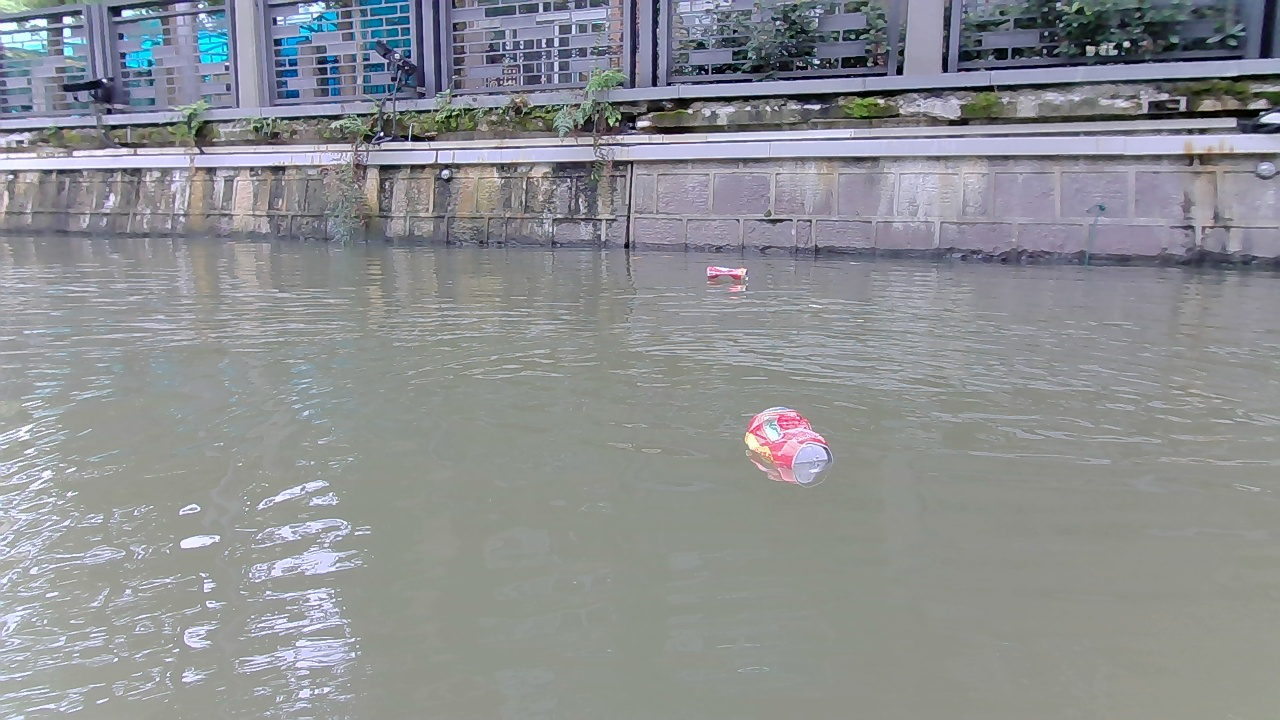

In [4]:
# Images are loaded using Pillow
dataset['image'][10]

In [5]:
# bbox are stored as [x_center, y_center, width, height]
# yolo format (https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/)
dataset['litter'][10]

{'label': [3, 3],
 'bbox': [[0.6164447069168091,
   0.6029766798019409,
   0.06980399042367935,
   0.08468712866306305],
  [0.5690440535545349,
   0.3828740119934082,
   0.03631694242358208,
   0.03186248242855072]]}

In [17]:
a = dataset['litter'][10]
b = zip(a['bbox'], a['label'])
pprint(list(b))

[([0.6164447069168091,
   0.6029766798019409,
   0.06980399042367935,
   0.08468712866306305],
  3),
 ([0.5690440535545349,
   0.3828740119934082,
   0.03631694242358208,
   0.03186248242855072],
  3)]


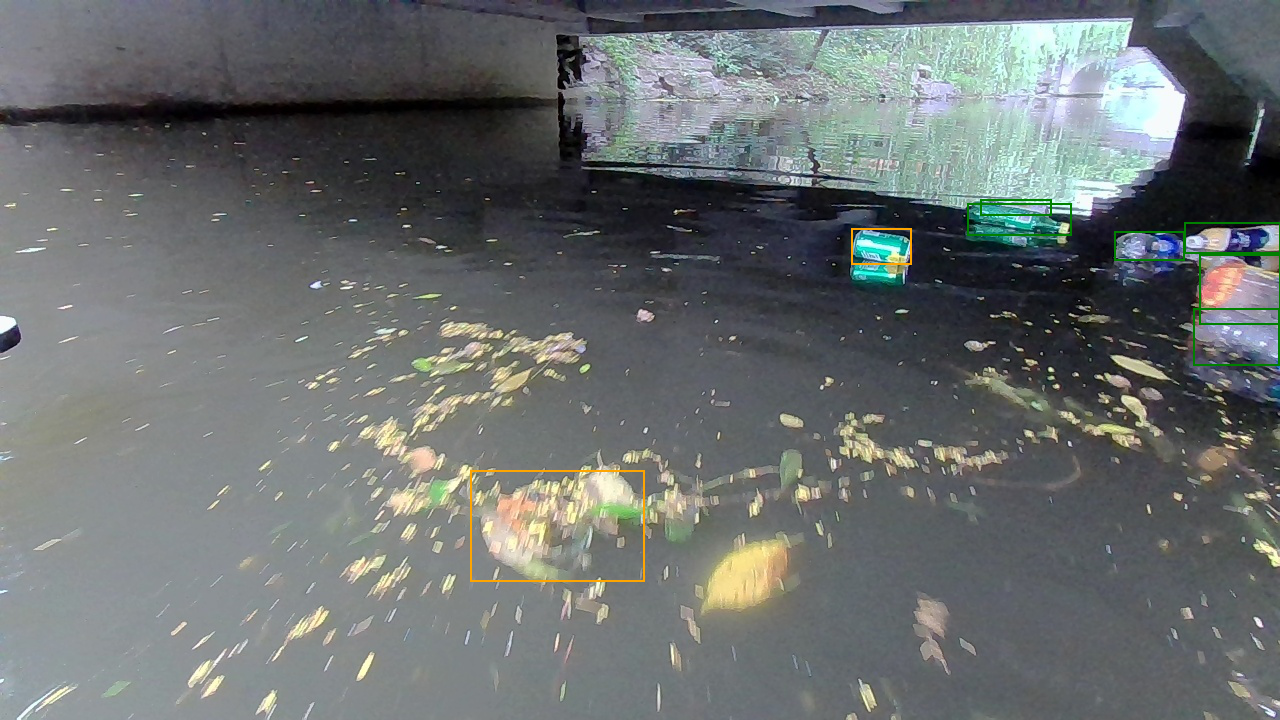

In [21]:
# Explore the dataset 
from PIL import Image, ImageDraw, ImageFont

idx = 100
label_color = {
    0: "red",   # PLASTIC_BAG
    1: "green", # PLASTIC_BOTTLE
    2: "blue",  # OTHER_PLASTIC_WASTE
    3: "orange" # NOT_PLASTIC_WASTE
}

# Carica l'immagine
image = dataset['image'][idx]

# Crea un oggetto ImageDraw per disegnare sulla tua immagine
draw = ImageDraw.Draw(image)

# Estrai le informazioni sulle bounding box dal dataset
features = dataset['litter'][idx]

# Disegna le bounding box sull'immagine
for bbox, label in zip(features['bbox'], features['label']):
    x_center, y_center, width, height = bbox  # Estrai le coordinate e le dimensioni
    left = (x_center - width / 2) * image.width
    top = (y_center - height / 2) * image.height
    right = (x_center + width / 2) * image.width
    bottom = (y_center + height / 2) * image.height
    draw.rectangle([(left, top), (right, bottom)], outline=label_color[label], width=2)

# Mostra l'immagine con le bounding box
display(image)

**TODO:** aggiungere l'informazione della classe corrispondente ['PLASTIC_BAG',
'PLASTIC_BOTTLE',
'OTHER_PLASTIC_WASTE',
'NOT_PLASTIC_WASTE'] affinaco alla bbox